In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

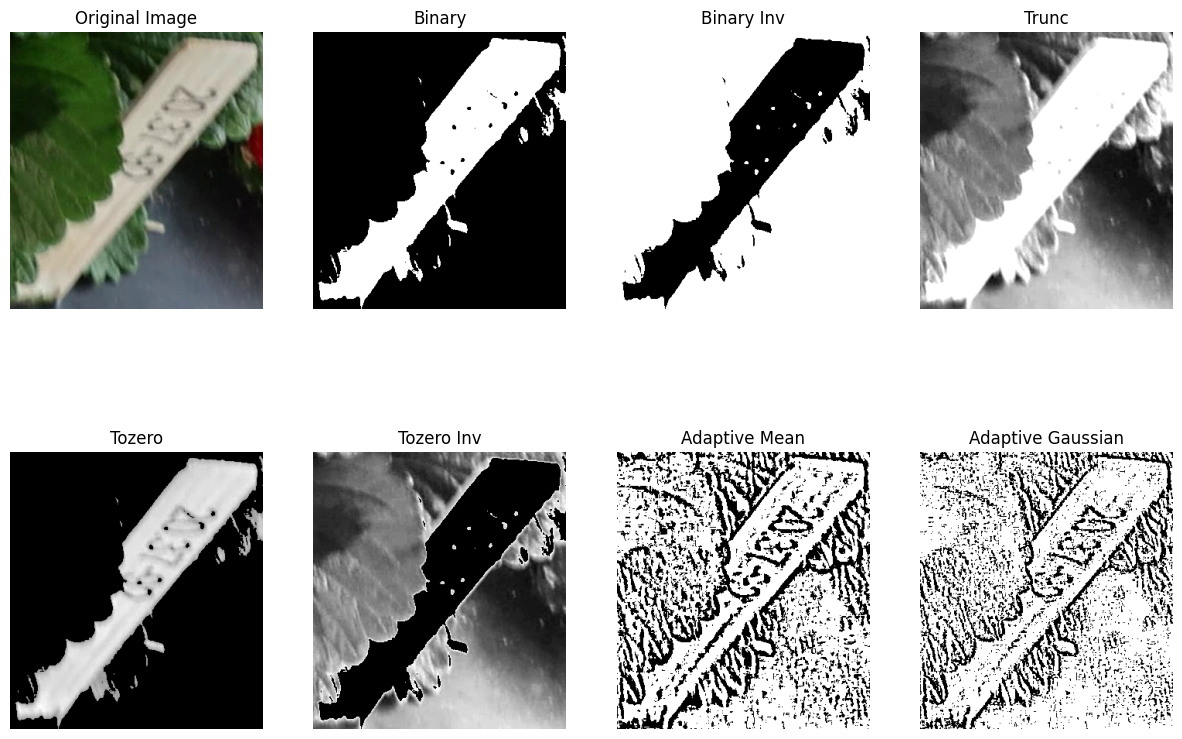

In [4]:
# Step 1: Read the image
image = cv2.imread('104_2062.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply binary thresholding
# You can change the threshold value (127) as needed
# Apply different thresholding methods
_, binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)

# Adaptive Thresholding
adaptive_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images using matplotlib
titles = ['Original Image', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv', 
          'Adaptive Mean', 'Adaptive Gaussian']
images = [image, binary, binary_inv, trunc, tozero, tozero_inv, adaptive_mean, adaptive_gaussian]

plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.title(titles[i])
    if i == 0:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.show()

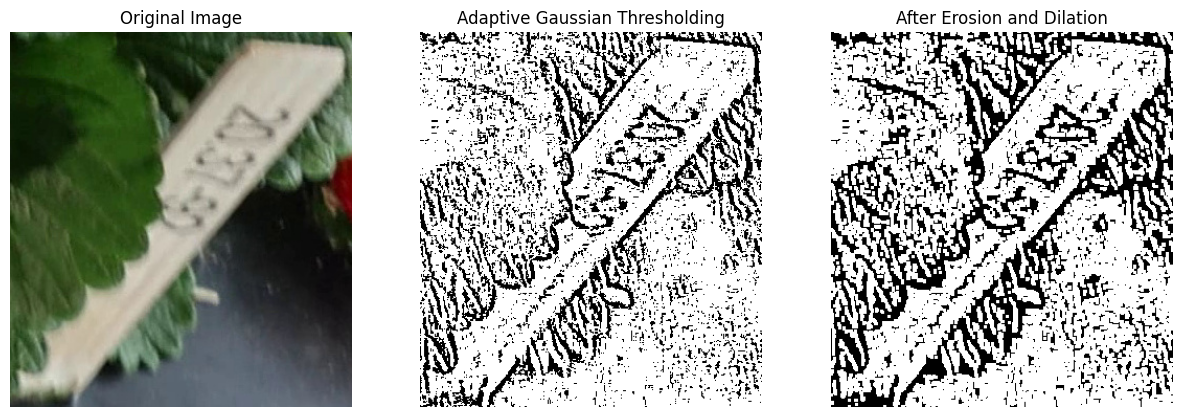

In [5]:
# Step 1: Read the image
image = cv2.imread('104_2062.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply adaptive Gaussian thresholding
adaptive_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Step 4: Apply erosion and dilation to sharpen the binary image
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(adaptive_gaussian, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adaptive Gaussian Thresholding')
plt.imshow(adaptive_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()

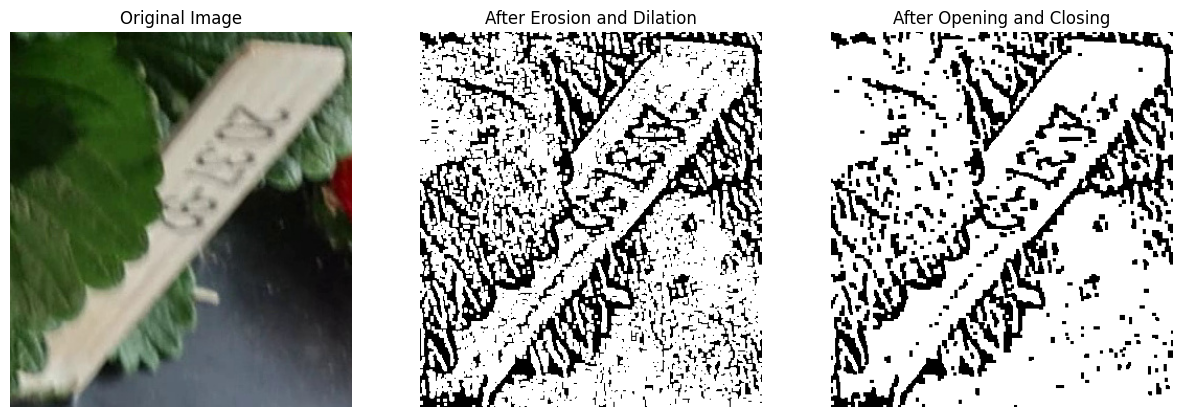

In [6]:
# Morphological opening
opened_image = cv2.morphologyEx(adaptive_gaussian, cv2.MORPH_OPEN, kernel)

# Morphological closing
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('After Opening and Closing')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.show()

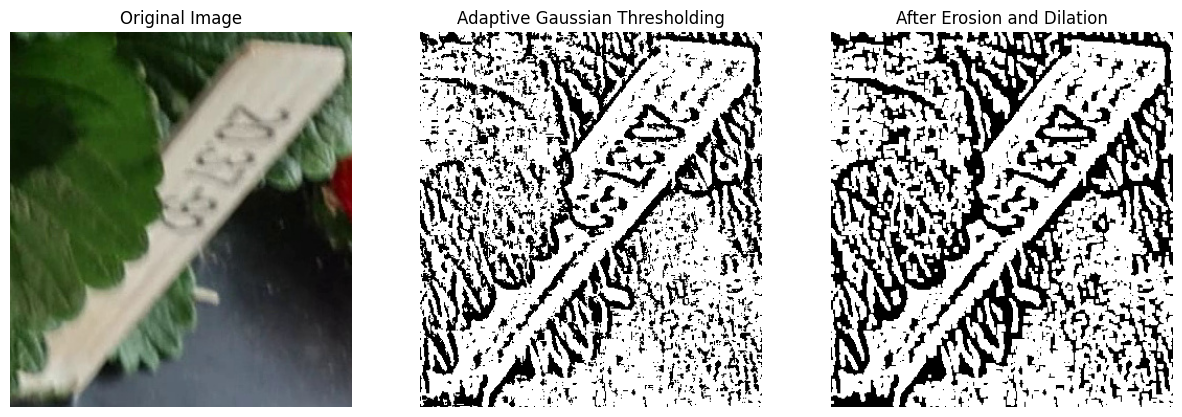

In [7]:
# Step 1: Read the image
image = cv2.imread('104_2062.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply adaptive mean thresholding
adaptive_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# Step 4: Apply erosion and dilation to sharpen the binary image
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(adaptive_mean, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adaptive Gaussian Thresholding')
plt.imshow(adaptive_mean, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()


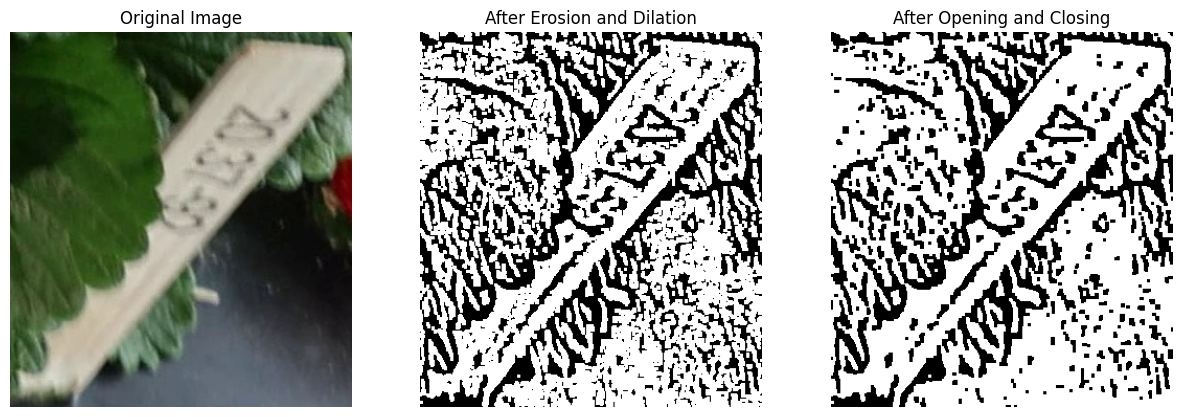

In [8]:
# Morphological opening
opened_image = cv2.morphologyEx(adaptive_mean, cv2.MORPH_OPEN, kernel)

# Morphological closing
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('After Erosion and Dilation')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('After Opening and Closing')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.show()

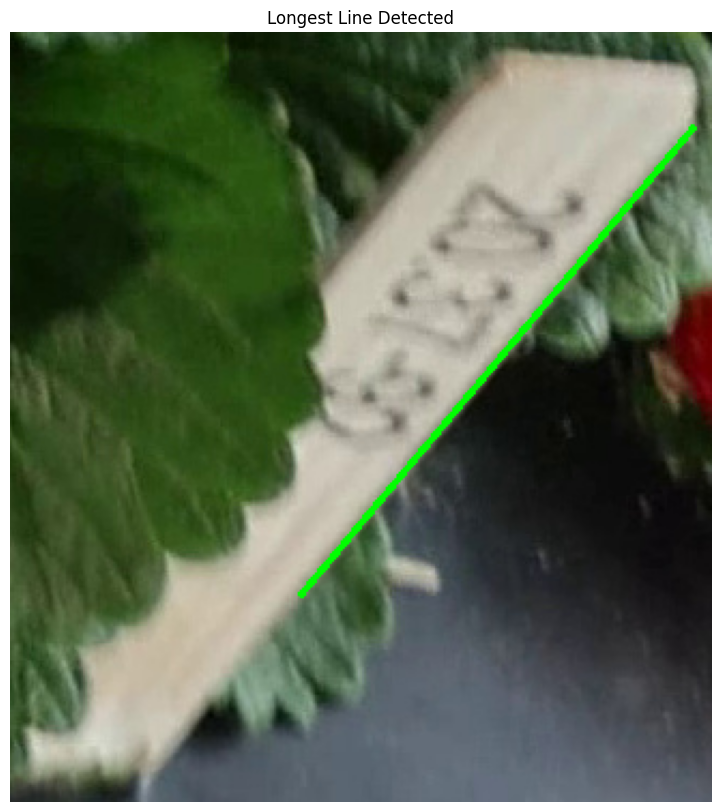

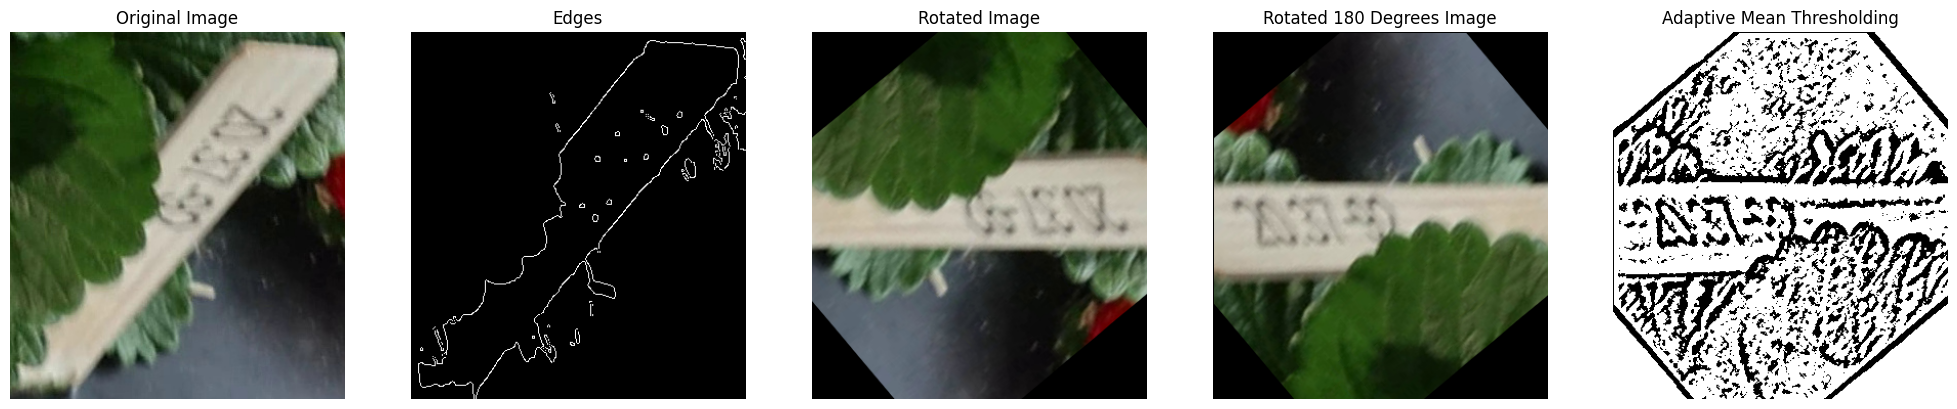

In [19]:
# Load the image
image_path = '104_2062.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using a threshold
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = cv2.Canny(binary, 50, 150)

# Find lines using HoughLinesP
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Find the longest line
max_length = 0
longest_line = None
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if length > max_length:
            max_length = length
            longest_line = line[0]

# Draw the longest line on a copy of the original image
line_image = image.copy()
if longest_line is not None:
    x1, y1, x2, y2 = longest_line
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the longest line before rotation
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    ax.set_title('Longest Line Detected')
    ax.axis('off')
    plt.show()
    
    # Calculate the angle to rotate (clockwise)
    angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
    
    # Rotate the image to make the line horizontal (clockwise)
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    # Use a positive angle for clockwise rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    # Rotate the image an additional 180 degrees clockwise
    M_180 = cv2.getRotationMatrix2D(center, 180, 1.0)
    rotated_180 = cv2.warpAffine(rotated, M_180, (w, h))

    # Apply adaptive mean thresholding
    rotated_gray = cv2.cvtColor(rotated_180, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(rotated_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Display the results
    fig, axes = plt.subplots(1, 5, figsize=(25, 10))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Edges')
    axes[1].axis('off')

    axes[2].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Rotated Image')
    axes[2].axis('off')

    axes[3].imshow(cv2.cvtColor(rotated_180, cv2.COLOR_BGR2RGB))
    axes[3].set_title('Rotated 180 Degrees Image')
    axes[3].axis('off')

    axes[4].imshow(adaptive_thresh, cmap='gray')
    axes[4].set_title('Adaptive Mean Thresholding')
    axes[4].axis('off')

    plt.show()
else:
    print("No lines were detected.")